In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("../../../../../Data/Housing_Data.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [20]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

# Using sklearn imputation

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=2)
X_train

,FireplaceQu,GarageQual
455,TA,TA
863,NaN,TA
504,Fa,TA
1413,Gd,TA
1389,Gd,TA
...,...,...
466,Po,TA
299,Gd,TA
493,Fa,TA
527,Gd,TA


In [22]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')

X_train_imp = imp.fit_transform(X_train)
X_test_imp = imp.transform(X_test)

In [23]:
pd.DataFrame(X_train_imp).isnull().mean()*100

0    0.0
1    0.0
dtype: float64

# Check Distribution

### 1) Check barplot

<Axes: xlabel='GarageQual'>

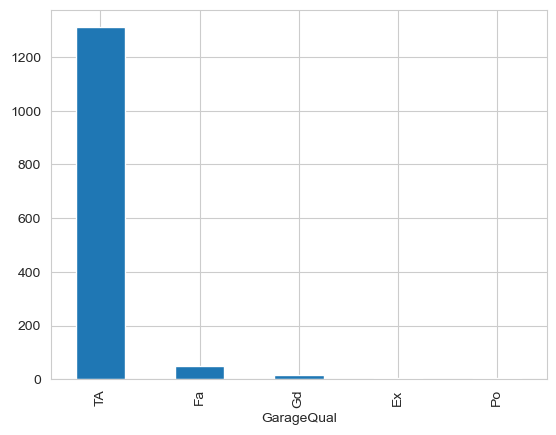

In [24]:
df['GarageQual'].value_counts().plot(kind='bar')

<Axes: xlabel='FireplaceQu'>

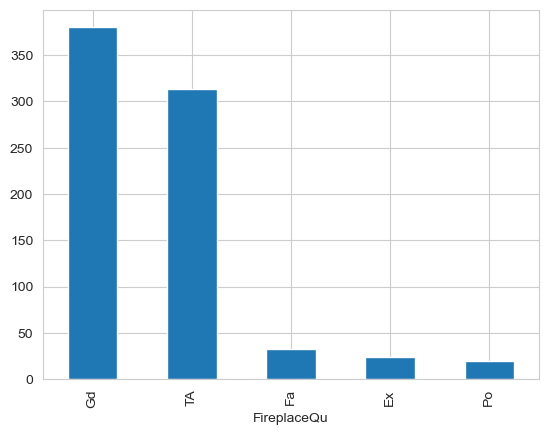

In [25]:
df['FireplaceQu'].value_counts().plot(kind='bar')

### 2) check most-frequent value and null value

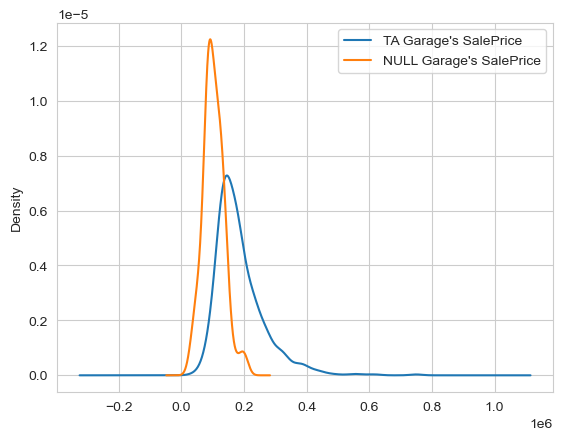

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax)

lines , labels = ax.get_legend_handles_labels()
labels = ["TA Garage's SalePrice", "NULL Garage's SalePrice"]

ax.legend(lines, labels)

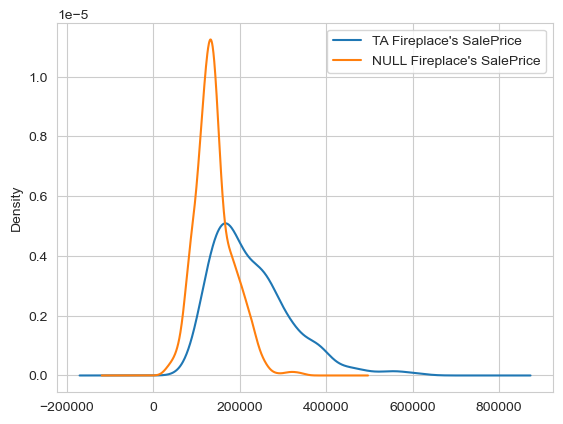

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax)

lines , labels = ax.get_legend_handles_labels()
labels = ["TA Fireplace's SalePrice", "NULL Fireplace's SalePrice"]

ax.legend(lines, labels)

### 3) after filling , change in distribution

In [28]:
impute_df = pd.DataFrame([])

impute_df['GarageQual'] = df['GarageQual']
impute_df['GarageQual_FillMode'] = df['GarageQual'].fillna(df['GarageQual'].mode())

impute_df['FireplaceQu'] = df['FireplaceQu']
impute_df['FireplaceQu_FillMode'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode())

impute_df['SalePrice'] = df['SalePrice']

impute_df

,GarageQual,GarageQual_FillMode,FireplaceQu,FireplaceQu_FillMode,SalePrice
0,TA,TA,NaN,Gd,208500
1,TA,TA,TA,TA,181500
2,TA,TA,TA,TA,223500
3,TA,TA,Gd,Gd,140000
4,TA,TA,TA,TA,250000
...,...,...,...,...,...
1455,TA,TA,TA,TA,175000
1456,TA,TA,TA,TA,210000
1457,TA,TA,Gd,Gd,266500
1458,TA,TA,NaN,NaN,142125


### change is bar plot

<Axes: xlabel='GarageQual_FillMode'>

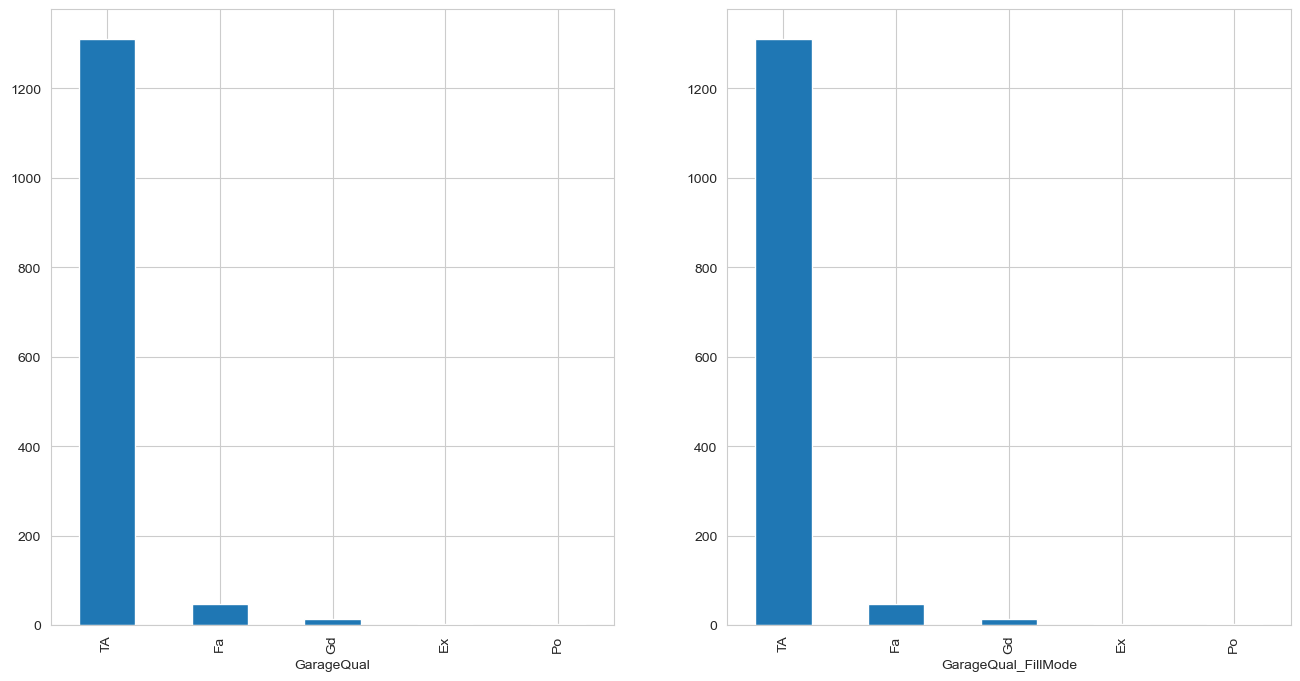

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize=(16,8))

impute_df['GarageQual'].value_counts().plot(kind='bar',ax=ax[0])
impute_df['GarageQual_FillMode'].value_counts().plot(kind='bar',ax=ax[1])

### change is Most-frequent value's distribution

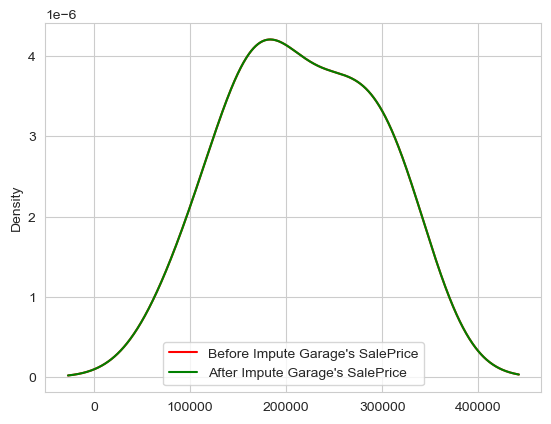

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1)

impute_df[impute_df['GarageQual'] == 'Gd']['SalePrice'].plot(kind='kde',ax=ax, color='red')
impute_df[impute_df['GarageQual_FillMode'] == 'Gd']['SalePrice'].plot(kind='kde',ax=ax, color='green')

lines , labels = ax.get_legend_handles_labels()
labels = ["Before Impute Garage's SalePrice", "After Impute Garage's SalePrice"]

ax.legend(lines, labels)

### change is bar plot

<Axes: xlabel='FireplaceQu_FillMode'>

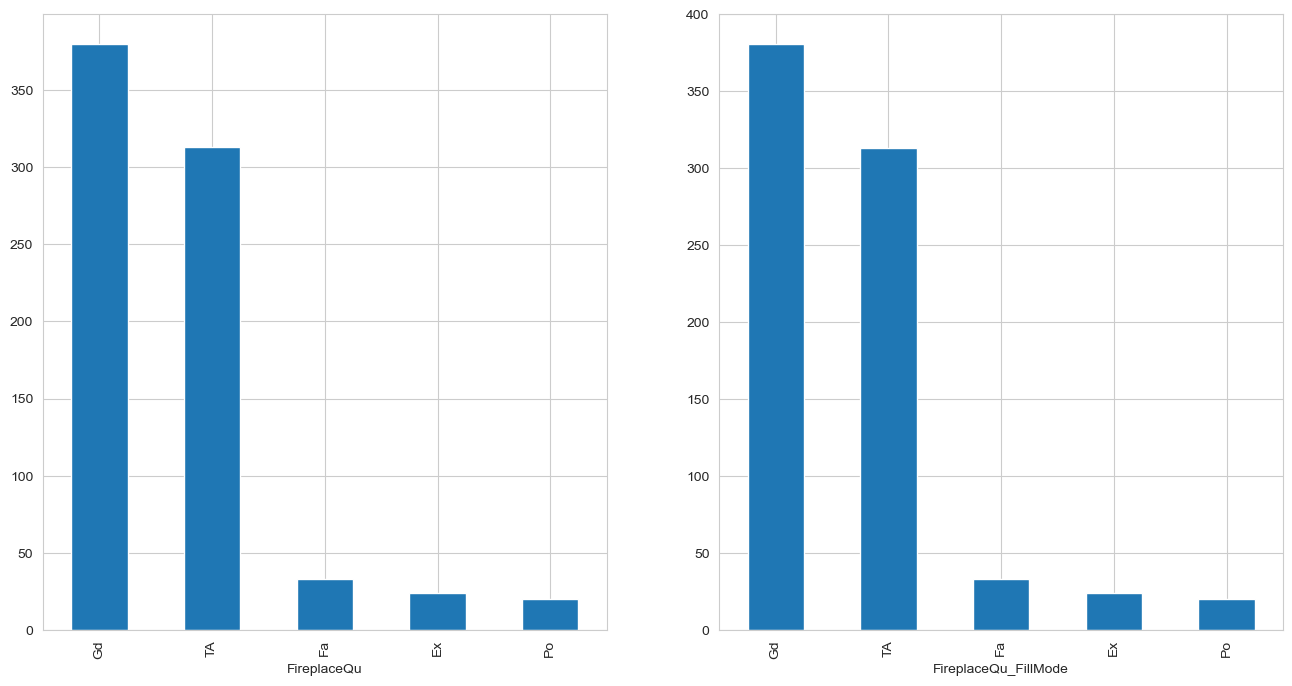

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize=(16,8))

impute_df['FireplaceQu'].value_counts().plot(kind='bar',ax=ax[0])
impute_df['FireplaceQu_FillMode'].value_counts().plot(kind='bar',ax=ax[1])

### change is Most-frequent value's distribution

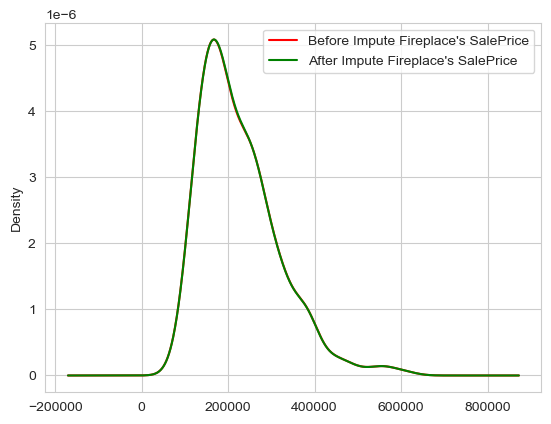

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1)

impute_df[impute_df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde',ax=ax, color='red')
impute_df[impute_df['FireplaceQu_FillMode'] == 'Gd']['SalePrice'].plot(kind='kde',ax=ax, color='green')

lines , labels = ax.get_legend_handles_labels()
labels = ["Before Impute Fireplace's SalePrice", "After Impute Fireplace's SalePrice"]

ax.legend(lines, labels)